# matplotlib `imshow` interpolation
matplotlib에서 `imshow`로 이미지를 그릴 수 있는데, 이때 자료 이미지의 크기가 작으면 각 픽셀의 구분이 보이게 된다. 상황에 따라 interpolation기법을 사용하여 이런 경계를 시각적으로 약화시킬 수 있다. 

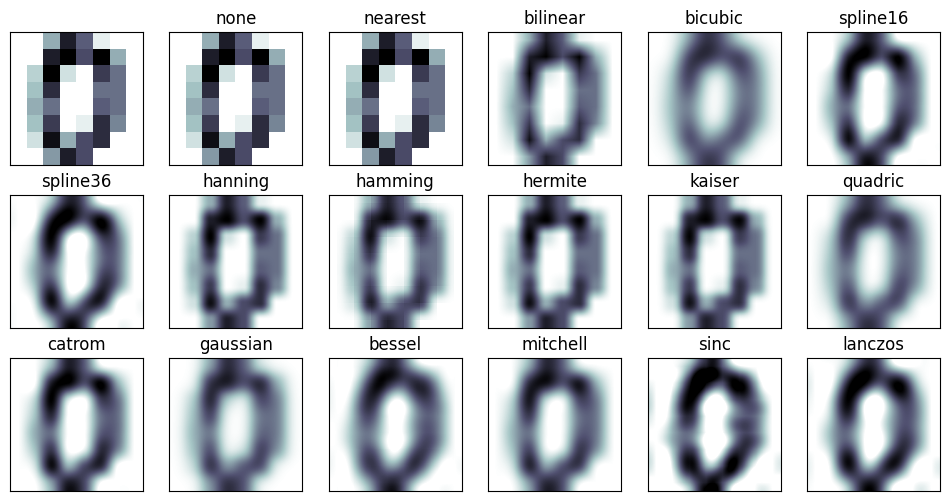

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
X = digits.images[0]

methods = [
    None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
    'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
    'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
]
fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(X, cmap=plt.cm.bone_r, interpolation=interp_method)
    ax.set_title(interp_method)
plt.show()

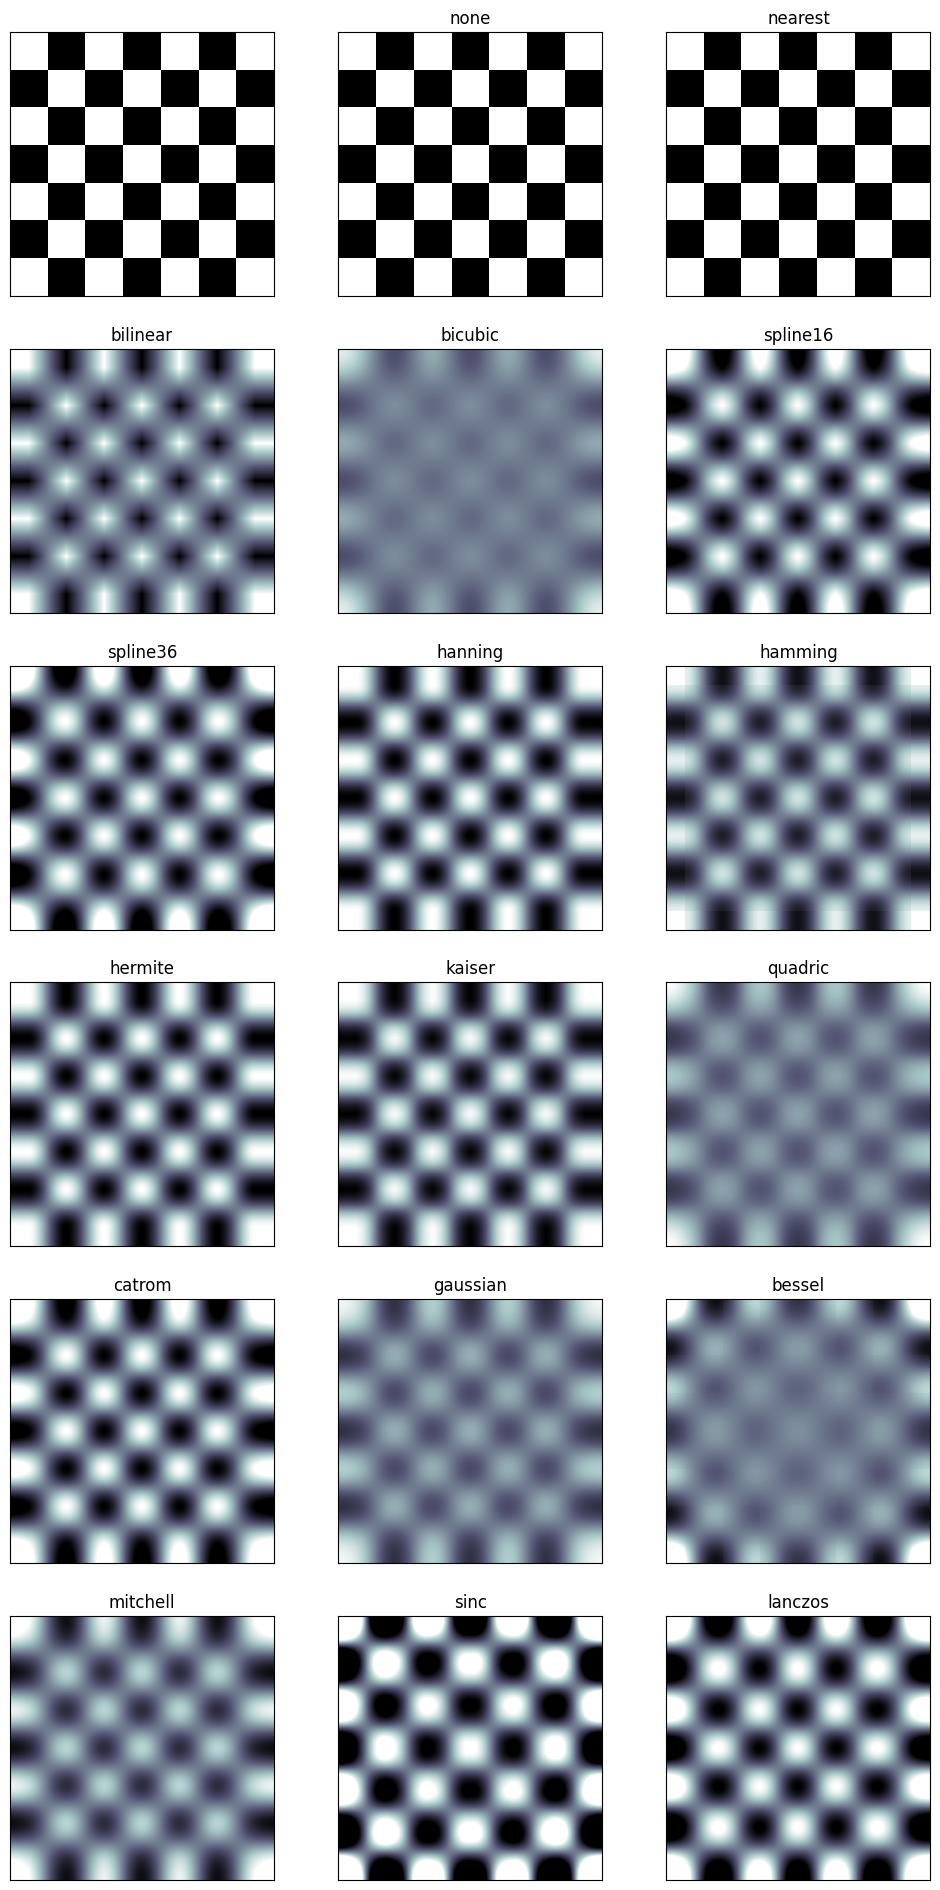

In [12]:
import numpy as np
tmp_img = np.array([0,1]*100)[:49].reshape(7,-1)
methods = [
    None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
    'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
    'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
]
fig, axes = plt.subplots(6, 3, figsize=(12, 24),
                         subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(tmp_img, cmap=plt.cm.bone_r, interpolation=interp_method)
    ax.set_title(interp_method)
plt.show()

# matplotlib Contour plot
$(x,y) \rightarrow z $ 형태의 함수를 시각화할때 사용할 수 있다. 이를 응용해서

$$
x = \mathfrak{Re}(z), y  = \mathfrak{Im}(z)
$$

로 대응하여 $ \mathbb{C} \rightarrow \mathbb{R}$ 또한 표현할 수 있다

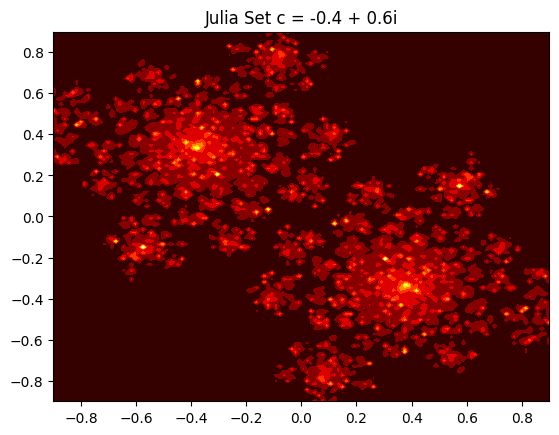

In [69]:
R = 10
N = 128
S = 0.9
MAX_ITER = 1000
X = np.linspace(-S,S,N)
Y = np.linspace(-S,S,N)
cx, cy = (-0.4,0.6)
XX,YY = np.meshgrid(X,Y)
# print(XX)
# print(YY)
# print(tuple(zip(XX,YY)))/
def julia(x,y):
    iter = 0
    while x*x+y*y < R**2 and iter<MAX_ITER:
        tx = x*x-y*y
        y= 2*x*y + cy
        x = tx+cx
        iter +=1
    return iter

vec_julia = np.vectorize(julia)

plt.title(f"Julia Set c = {cx :.3} + {cy :.3}i")
plt.contourf(XX,YY,vec_julia(XX,YY),cmap='hot')
    

# matplotlib triangluar grid
2차원 또는 2차원으로 plotting 할대 그 영역을 삼각형으로 구성하여 원하는 형태를 사용할 수 있게 해준다.


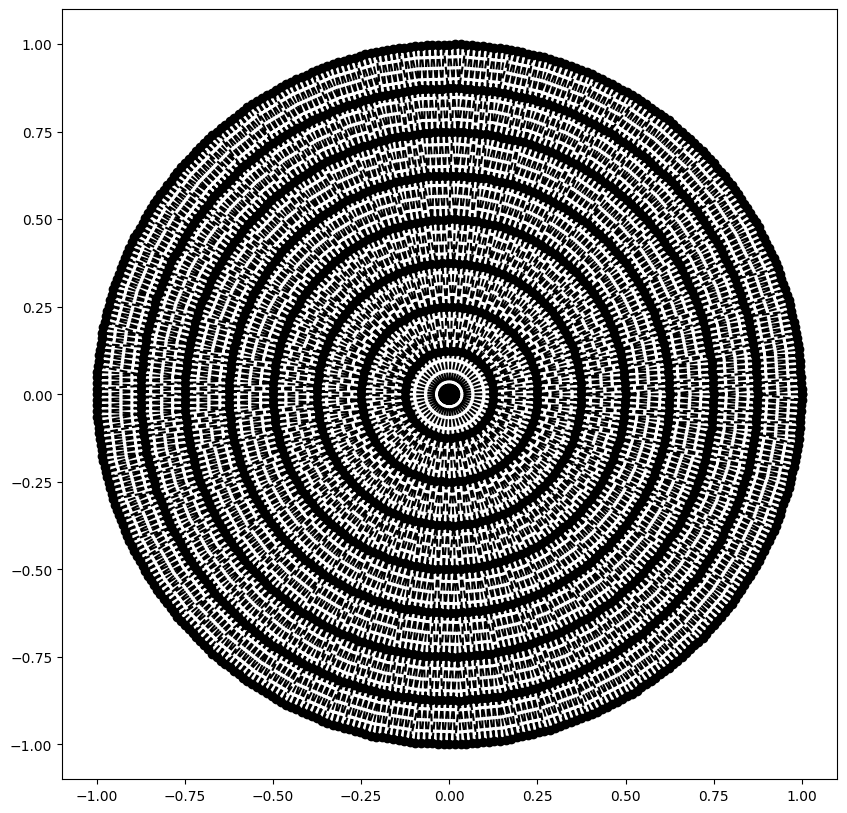

In [148]:
import matplotlib.tri as mtri
import math
N=50
R = 1
X = [0]+[math.cos(i) for i in np.linspace(0,math.tau,N)]
Y = [0]+[math.sin(i) for i in np.linspace(0,math.tau,N)]
# triangles = [[0,i,i+1] for i in range(N)]
# trg = mtri.Triangulation(X,Y,triangles)
trg = mtri.Triangulation(X,Y)
refiner = mtri.UniformTriRefiner(trg)
trg5 = refiner.refine_triangulation(subdiv=3)
fig, ax = plt.subplots(figsize=(10,10))
ax.triplot(trg5, 'ko--')

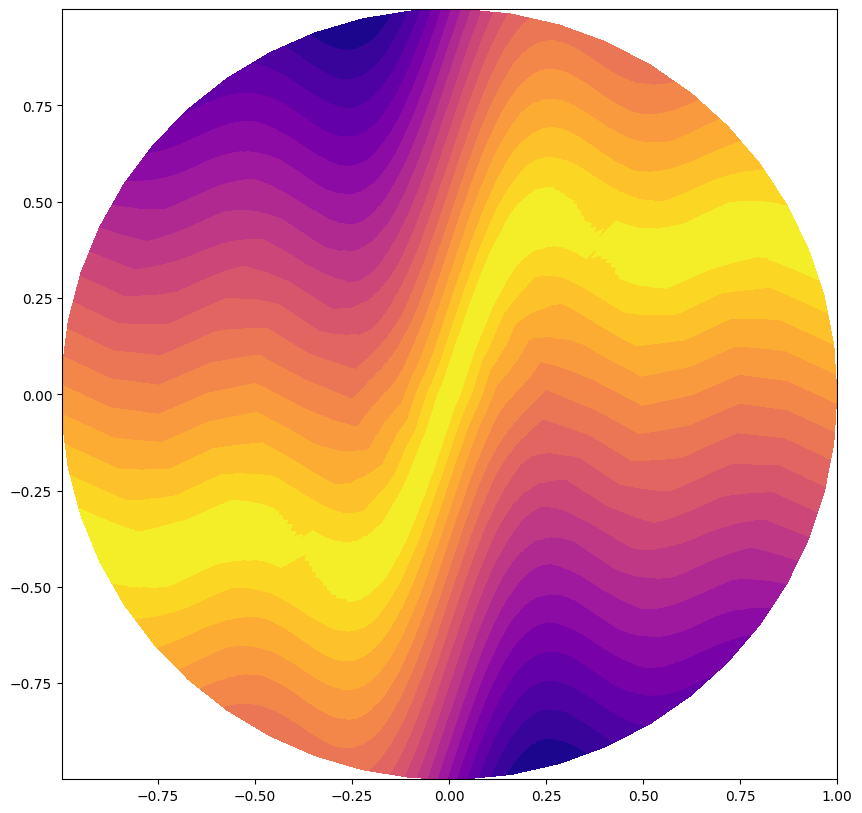

In [150]:
tgx = trg5.x
tgy = trg5.y
def f(x):
    return (np.sin(x)+ 1/3*np.sin(x*3)+1/5*np.sin(x*5))/1
v_f = np.vectorize(f)
z = -np.abs(v_f(tgx*2)-tgy*2)
fig, ax = plt.subplots(figsize=(10,10))
ax.tricontourf(trg5, z, levels = np.linspace(z.min(),z.max(),20), cmap="plasma")

(-7.866847927365317, 2.0)

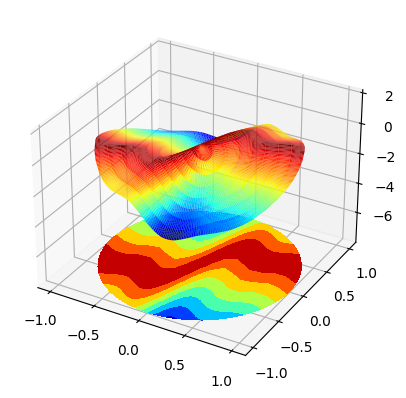

In [166]:
import matplotlib as mtb
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_trisurf(trg5.x,trg5.y, z, cmap = mtb.cm.jet)
ax.tricontourf(trg5,z,cmap = mtb.cm.jet, offset = -8)
ax.set_zlim([z.min()-5,7-5])